In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

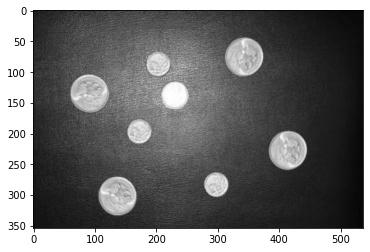

In [7]:
pic = cv.imread('money.JPG')
plt.imshow(pic, cmap='gray')

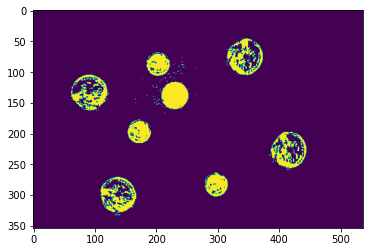

In [30]:
img = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
for i in range(len(img)):
  for j in range(len(img[i])):
      if(img[i][j]<190):
        img[i][j]=0
      else:
        img[i][j]=255

plt.imshow(img)

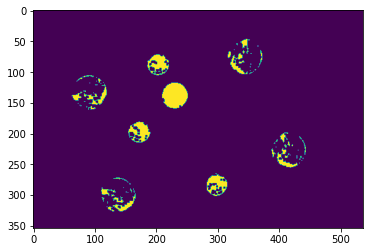

In [31]:
fg = cv.erode(img,None,iterations = 1)
plt.imshow(fg)

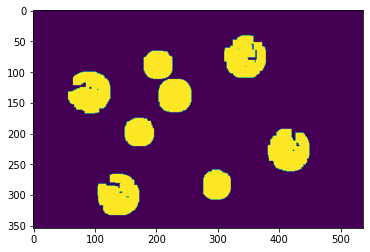

In [32]:
fg1 = cv.dilate(fg,None,iterations = 6)
#fg1 = cv.erode(fg1, None, iterations = 4)
plt.imshow(fg1)

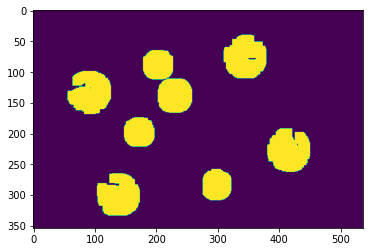

In [45]:
fg2 = cv.erode(fg1, None, iterations = 3)
fg2 = cv.dilate(fg2, None, iterations = 4)
#fg2 = cv.erode(fg2, None, iterations = 2)
plt.imshow(fg2)

In [91]:
contours,_ = cv.findContours(fg2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
len(contours)

11

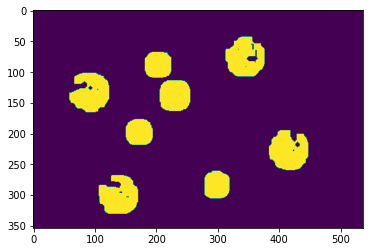

In [47]:
#plt.imshow(cv.drawContours(fg1, contours, -1, (0,255,0), 3))

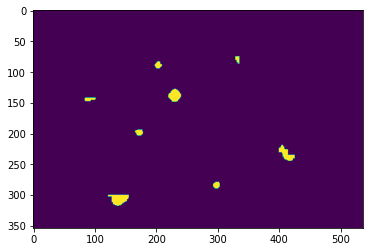

In [63]:
small = fg2.copy()

small = cv.erode(small, None, iterations = 16)
small = cv.dilate(small, None, iterations = 2)
small = cv.erode(small, None, iterations = 1)
plt.imshow(small)

In [116]:
contours,_ = cv.findContours(small, cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
len(contours)

8

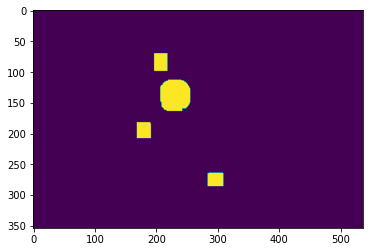

In [120]:
#small2 = small.copy()
small2 = cv.erode(fg, None, iterations = 5)
small2 = cv.dilate(small2, None, iterations =10)
plt.imshow(small2)

In [121]:
contours2,_ = cv.findContours(small2, cv.RETR_EXTERNAL , cv.CHAIN_APPROX_SIMPLE)
len(contours2)

4

In [80]:
print('Больше монеты:',len(contours)-len(contours2))
print('Маленькие монет:',len(contours2))

Больше монеты: 4
Маленькие монет: 4


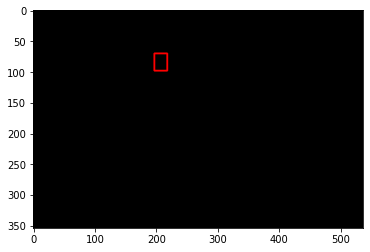

In [122]:
 height, width, channels = pic.shape
 drawing = np.zeros((height, width, 3), dtype=np.uint8)
 color = (255,0,0)
 plt.imshow(cv.drawContours(drawing, contours2, 3, color, 2, cv.LINE_8, _, 0))

In [112]:
height, width, channels = pic.shape
print(width,' ',height) 

537   354


In [ ]:
#TODO сделать покраску контуров монет